In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
data = pd.read_csv("air_quality_dataset_delhi.csv")

In [7]:
data.head()
#first five rows of given data

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [19]:
data.tail()
#last five rows of given data

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667
1092,16.3,23.4,9.0,1017.3,68.0,1.3,7.8,18.3,185.583333


<AxesSubplot:>

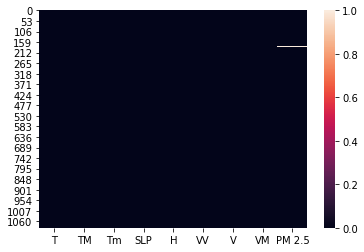

In [9]:
sns.heatmap(data.isnull())
#checking null value in given data set

In [10]:
data = data.dropna()
#removing null values

In [14]:
data.columns
# these are the columns of our given dataset

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

<AxesSubplot:>

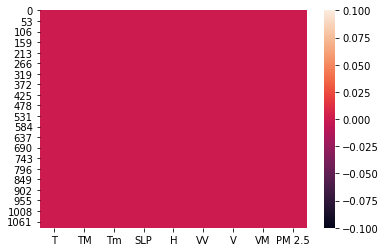

In [11]:
sns.heatmap(data.isnull())
#checking null values again

In [21]:
data.dtypes

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

In [15]:
data.count

<bound method DataFrame.count of          T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
0      7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4  219.720833
1      7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1  182.187500
2      6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1  154.037500
3      8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6  223.208333
4     12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2  200.645833
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[1092 rows x 9 columns]>

In [16]:
#getting all columns except PM 2.5 as independent features and PM 2.5 as dependent feature
ind_feat = data.iloc[:,:-1]
dep_feat = data.iloc[:,-1]

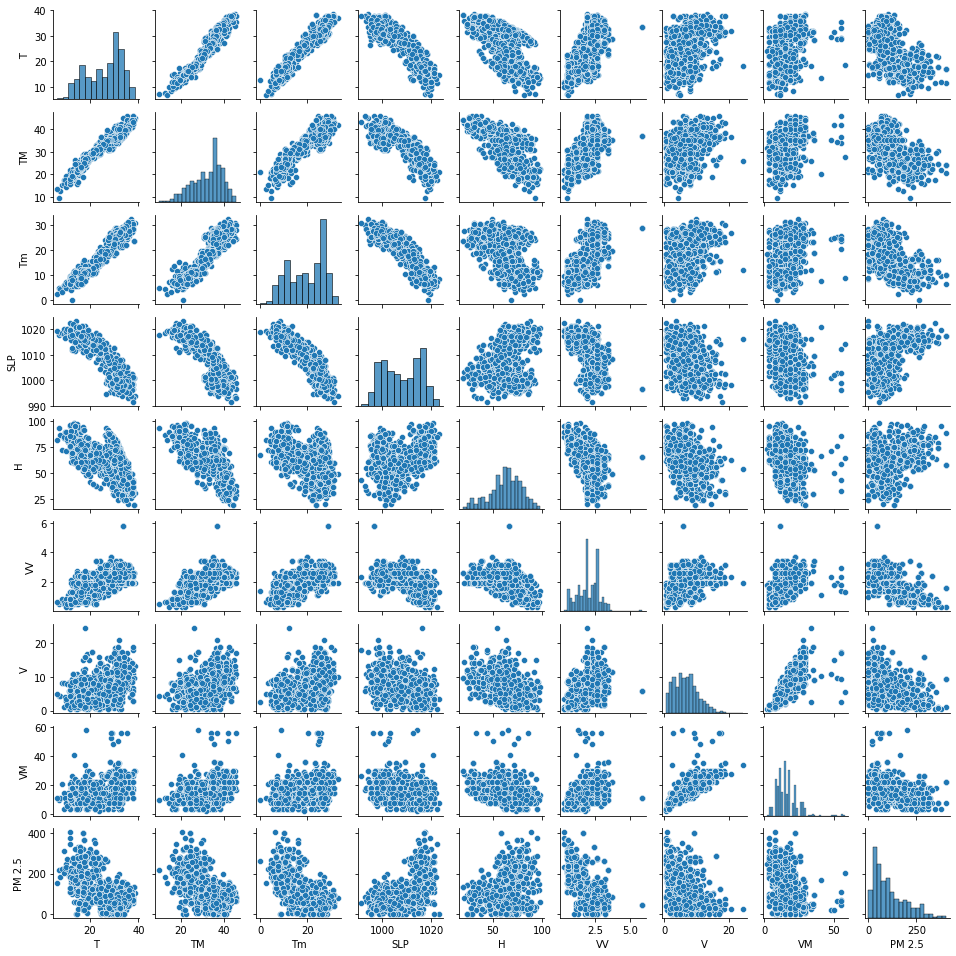

In [25]:
sns.pairplot(data, height = 1.5)

In [26]:
corr_matrix = data.corr()
#getting correlation matrix of every feature to determine the relation between each features
corr_matrix

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


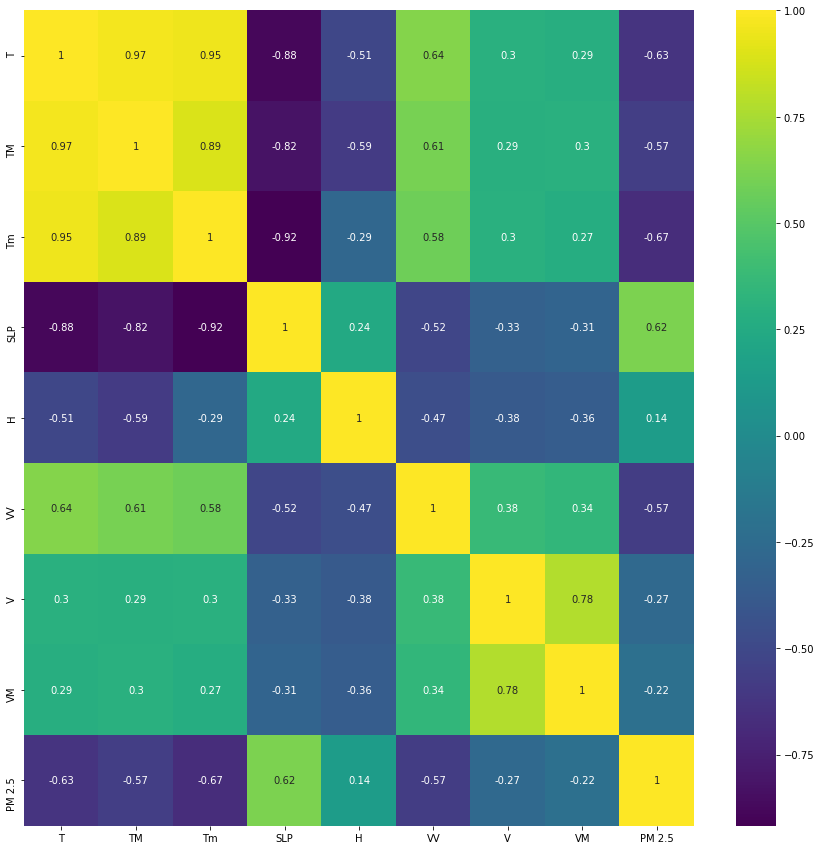

In [28]:
corr_features = corr_matrix.index
plt.figure(figsize=(15,15))
#getting a heatmap with the correlation matrix
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="viridis")

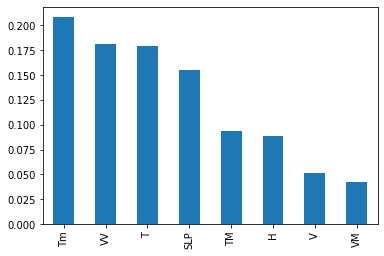

In [38]:
#now let's find the importance of each independent feature and visualize it
model = ExtraTreesRegressor()
model.fit(ind_feat,dep_feat)
feature_importances = pd.Series(model.feature_importances_, index=ind_feat.columns)
feature_importances.nlargest(8).plot(kind='bar')
plt.show()

In [54]:
#splitting data randomly into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.3, random_state=0)

In [50]:
#fitting training data into linear regression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [51]:
prediction = regression.predict(X_test)
#checking Mean Squared Error
metrics.mean_squared_error(Y_test, prediction)

3548.7792584091912

In [55]:
#checking accuracy
regression.score(X_test,Y_test)

0.48577772460117175